## Feature Selection

In [1]:
# libraries for this project
import json
import pandas as pd
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import sys
import gc
import feather
from icecream import ic
from sys import getsizeof
import time
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

# Pandas has a high consume of memory RAM usage
# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# Get start time 
start_time = time.time()

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

>>> date:  12/07/2021 10:09:45


In [2]:
print("Loading dataset - cleaned to feature select/engineering...")

# loading data feather format
df_cleaned = pd.read_feather('../data/dataset_preprocessed.ftr')
df_cleaned.head()

Loading dataset - cleaned to feature select/engineering...


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_cleaned.shape

(20433, 10)

In [4]:
df_cleaned.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df_cleaned.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
df_cleaned.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20428      INLAND
20429      INLAND
20430      INLAND
20431      INLAND
20432      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [7]:
# get statistic - category feature
df_cleaned['ocean_proximity'].value_counts(normalize=True).map('{:.2%}'.format)

<1H OCEAN     44.21%
INLAND        31.79%
NEAR OCEAN    12.86%
NEAR BAY      11.11%
ISLAND         0.02%
Name: ocean_proximity, dtype: object

In [8]:
# convert object type to category.
df_cleaned['ocean_proximity'] = df_cleaned['ocean_proximity'].astype('category')

In [9]:
df_cleaned.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

/home/andsilva/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_bedrooms'>

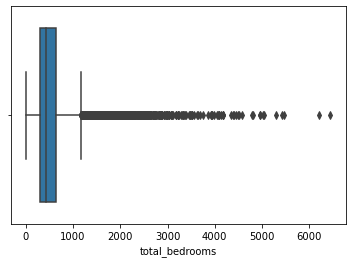

In [10]:
## Seaborn plot
sns.boxplot(df_cleaned["total_bedrooms"])

## Heatmap

<AxesSubplot:>

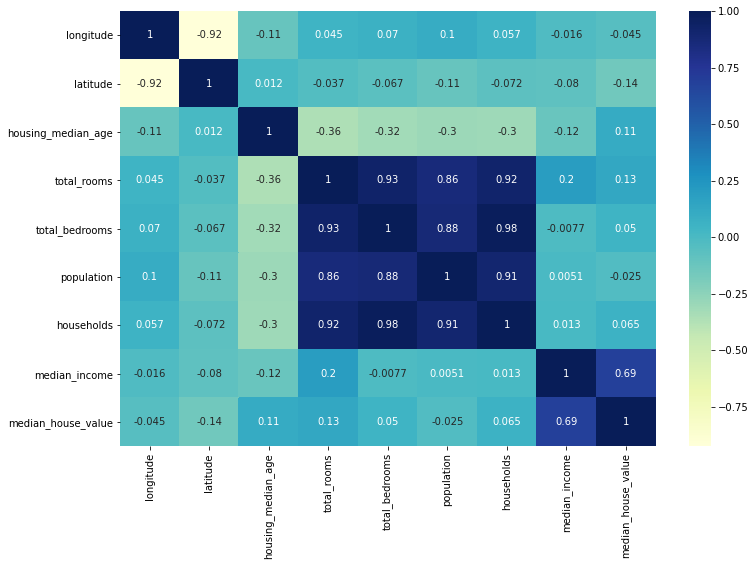

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(df_cleaned.corr(), annot = True, cmap = 'YlGnBu')

In [12]:
print("saving the file format feather...")
# this is important to do before save in feather format.
df_cleaned = df_cleaned.reset_index(drop=True) 
df_cleaned.to_feather('../data/dataset_featureselect.ftr')

saving the file format feather...


In [13]:
# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the modeling.")

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

print("All Done. :)")

time of execution (preprocessing): 0.0562 minutes
the preprocessing is done.
The next step is to do the modeling.
>>> date:  12/07/2021 10:09:48
All Done. :)
